## number of collection point 與 hk total recycling rate

Model Summary (coefficients):
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3189      0.011     29.945      0.000       0.293       0.345
Number of G@C collection points  8.167e-06      0.000      0.074      0.943      -0.000       0.000

R-squared: 0.0009


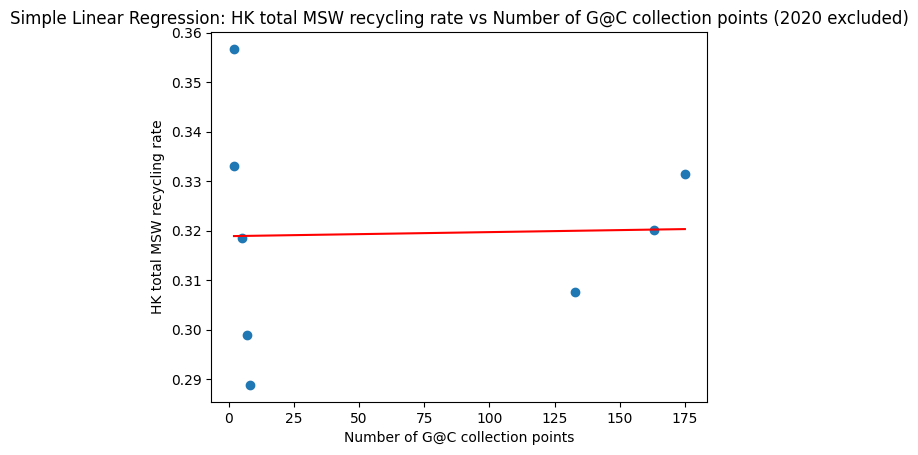

In [1]:
#!pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

# Column names in the Excel file
col_points = "Number of G@C collection points"
col_rate   = "HK total MSW recycling rate"

# ----------------------------------------------------
# Prepare data
#   - keep only rows where BOTH variables are non-missing
#   - drop the year 2020
# ----------------------------------------------------
sub = df[[col_points, col_rate, "Year"]].dropna(subset=[col_points, col_rate, "Year"])

# remove 2020 from the analysis
sub = sub[sub["Year"] != 2020]

X_gc   = sub[[col_points]]          # predictor: number of G@C points
y_rate = sub[col_rate]              # outcome: HK total MSW recycling rate (decimal, e.g. 0.33)

# Fit model using sklearn for predictions
lin_reg_gc = LinearRegression()
lin_reg_gc.fit(X_gc, y_rate)

# Fit model using statsmodels for statistical tests
X_gc_sm = sm.add_constant(X_gc)     # Add constant term for intercept
model_gc = sm.OLS(y_rate, X_gc_sm)
results_gc = model_gc.fit()

# Predictions for plotting
y_pred_gc = lin_reg_gc.predict(X_gc)

print("Model Summary (coefficients):")
print(results_gc.summary().tables[1])  # coefficient statistics
print(f"\nR-squared: {results_gc.rsquared:.4f}")

# Plot
plt.scatter(X_gc, y_rate)
plt.plot(X_gc, y_pred_gc, color='red')
plt.xlabel('Number of G@C collection points')
plt.ylabel('HK total MSW recycling rate')
plt.title('Simple Linear Regression: HK total MSW recycling rate vs Number of G@C collection points (2020 excluded)')
plt.show()


**Collection-points coefficient ($\hat \beta_1$) ≈ 0.000008, p ≈ 0.92 > 0.05**  

- The slope is **even closer to zero than before**: each additional G@C collection point is associated with only about **0.0008 percentage points** increase in the HK total MSW recycling rate.

- The effect is still **not statistically significant** (p-value ≈ 0.92), so **even after removing 2020, we still cannot conclude** that the number of G@C collection points has a real impact on the overall HK recycling rate.  

- The model’s **R-squared ≈ 0.00–0.01** (about **0.1% of the variance explained**), meaning the number of collection points explains **virtually none of the variation** in the HK total MSW recycling rate; almost all variation is driven by other factors.
